Se carga el dataset que se utilizara

In [11]:
from pandas import DataFrame
import pandas as pd

dataset =  DataFrame(pd.read_csv('waterseries.csv', header=None))
print(dataset.head)

<bound method NDFrame.head of             0
0     0.12000
1     0.12000
2     0.09400
3     0.08540
4     0.06840
5     0.06840
6     0.07690
7     0.09400
8     0.20500
9     0.35900
10    0.35900
11    0.34200
12    0.32500
13    0.30800
14    0.27400
15    0.19700
16    0.19700
17    0.19700
18    0.16200
19    0.16200
20    0.17900
21    0.19700
22    0.20500
23    0.20500
24    0.13700
25    0.09400
26    0.06840
27    0.06840
28    0.05980
29    0.05980
...       ...
3489  0.12000
3490  0.07690
3491  0.07690
3492  0.05130
3493  0.02560
3494  0.01710
3495  0.01710
3496  0.00856
3497  0.00856
3498  0.02560
3499  0.06840
3500  0.16200
3501  0.25600
3502  0.29100
3503  0.29100
3504  0.25600
3505  0.21400
3506  0.17900
3507  0.16200
3508  0.13700
3509  0.13700
3510  0.15400
3511  0.18800
3512  0.18800
3513  0.15400
3514  0.11100
3515  0.08540
3516  0.03420
3517  0.01710
3518  0.01710

[3519 rows x 1 columns]>


Se aplica media movil en los datos.

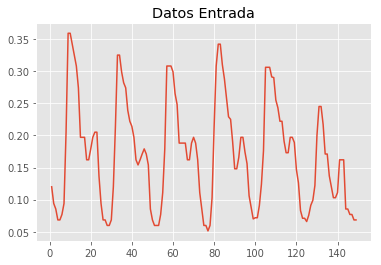

<Figure size 2560x1920 with 0 Axes>

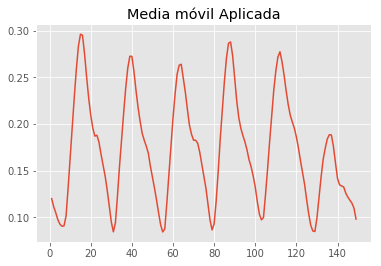

<Figure size 2560x1920 with 0 Axes>

In [12]:
from matplotlib import pyplot

pyplot.style.use("ggplot")
pyplot.plot(dataset[1:150])
pyplot.title('Datos Entrada')
pyplot.figure(num=None, figsize=(8, 6), dpi=320, facecolor='w', edgecolor='k')
pyplot.show()

dataset=dataset.rolling(window=8, min_periods=1).mean()

pyplot.plot(dataset[1:150])
pyplot.title('Media móvil Aplicada')
pyplot.figure(num=None, figsize=(8, 6), dpi=320, facecolor='w', edgecolor='k')
pyplot.show()

Se define el tamaño de ventana que tendra la serie de tiempos, y se transforma a una colección de datos para el entrenamiento supervisado de la red.

In [13]:
import Tools as tls

size = 50
outputs = 1

dataset = tls.series_to_supervised(dataset,size, n_out=outputs, dropnan = True)
print(dataset)

      var1(t-50)  var1(t-49)  var1(t-48)  var1(t-47)  var1(t-46)  var1(t-45)  \
50      0.120000    0.120000    0.111333    0.104850    0.097560    0.092700   
51      0.120000    0.111333    0.104850    0.097560    0.092700    0.090443   
52      0.111333    0.104850    0.097560    0.092700    0.090443    0.090887   
53      0.104850    0.097560    0.092700    0.090443    0.090887    0.101512   
54      0.097560    0.092700    0.090443    0.090887    0.101512    0.131387   
55      0.092700    0.090443    0.090887    0.101512    0.131387    0.164512   
56      0.090443    0.090887    0.101512    0.131387    0.164512    0.196587   
57      0.090887    0.101512    0.131387    0.164512    0.196587    0.228662   
58      0.101512    0.131387    0.164512    0.196587    0.228662    0.258612   
59      0.131387    0.164512    0.196587    0.228662    0.258612    0.283250   
60      0.164512    0.196587    0.228662    0.258612    0.283250    0.296125   
61      0.196587    0.228662    0.258612

Se normalizan los datos entre 0 y 1

In [14]:
from sklearn import preprocessing

datasetnorm = preprocessing.minmax_scale(dataset, feature_range=(0, 1))
print(datasetnorm)
datasetnorm = DataFrame(datasetnorm)
print(datasetnorm.head)

[[0.29562949 0.29562949 0.27098955 ... 0.43422914 0.39456832 0.3613044 ]
 [0.29562949 0.27098955 0.25255699 ... 0.39456832 0.3613044  0.32782726]
 [0.27098955 0.25255699 0.23183101 ... 0.3613044  0.32782726 0.29150704]
 ...
 [0.44062604 0.38298281 0.33738708 ... 0.39193848 0.36471608 0.32818264]
 [0.38298281 0.33738708 0.29179135 ... 0.36471608 0.32818264 0.28557213]
 [0.33738708 0.29179135 0.24011856 ... 0.32818264 0.28557213 0.2369201 ]]
<bound method NDFrame.head of             0         1         2         3         4         5         6   \
0     0.295629  0.295629  0.270990  0.252557  0.231831  0.218014  0.211596   
1     0.295629  0.270990  0.252557  0.231831  0.218014  0.211596  0.212861   
2     0.270990  0.252557  0.231831  0.218014  0.211596  0.212861  0.243068   
3     0.252557  0.231831  0.218014  0.211596  0.212861  0.243068  0.328005   
4     0.231831  0.218014  0.211596  0.212861  0.243068  0.328005  0.422182   
5     0.218014  0.211596  0.212861  0.243068  0.328005  0.

Preparamos los datos para alimentar la red para entrenamiento y prueba.

In [15]:
import numpy as np
from sklearn.model_selection import train_test_split

zy = datasetnorm.iloc[:, -1:]
zx = datasetnorm.iloc[:, :-1].values
X = np.array(zx, dtype='float64')
y = np.array(zy, dtype='float64')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=20)

print(X_train.shape, y_train.shape) 

X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
y_train = y_train.reshape((y_train.shape[0], y_train.shape[1]))
y_test = y_test.reshape((y_test.shape[0], y_test.shape[1]))

print(X_train.shape, y_train.shape) 

(2428, 50) (2428, 1)
(2428, 50, 1) (2428, 1)


Se define la topologia del modelo y se compila

In [16]:
from keras.layers import Convolution1D, Dense, MaxPooling1D, Flatten
from keras.models import Sequential

model = Sequential((
        Convolution1D(4, 5,activation='relu',input_shape=(X_train.shape[1], X_train.shape[2])),
        MaxPooling1D(),
        Convolution1D(4, 5,activation='relu'),
        MaxPooling1D(),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(outputs, activation='linear'),
        ))

model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])

Se entrena modelo y se guarda información como "history"

In [ ]:
history = model.fit(X_train, y_train, 24, epochs=30, validation_data=(X_test, y_test), verbose = 1)

Train on 2428 samples, validate on 1041 samples
Epoch 1/30
2428/2428 [==============================] - 0s 173us/step - loss: 0.0382 - mean_squared_error: 0.0382 - mean_absolute_error: 0.1462 - val_loss: 0.0144 - val_mean_squared_error: 0.0144 - val_mean_absolute_error: 0.0928
Epoch 2/30
2428/2428 [==============================] - 0s 58us/step - loss: 0.0141 - mean_squared_error: 0.0141 - mean_absolute_error: 0.0890 - val_loss: 0.0126 - val_mean_squared_error: 0.0126 - val_mean_absolute_error: 0.0849
Epoch 3/30
2428/2428 [==============================] - 0s 56us/step - loss: 0.0126 - mean_squared_error: 0.0126 - mean_absolute_error: 0.0818 - val_loss: 0.0112 - val_mean_squared_error: 0.0112 - val_mean_absolute_error: 0.0784
Epoch 4/30
2428/2428 [==============================] - 0s 56us/step - loss: 0.0116 - mean_squared_error: 0.0116 - mean_absolute_error: 0.0773 - val_loss: 0.0105 - val_mean_squared_error: 0.0105 - val_mean_absolute_error: 0.0738
Epoch 5/30
2428/2428 [=============

Se grafica el MSE y MAE

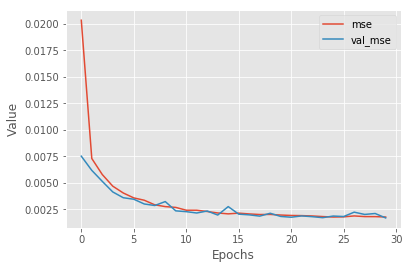

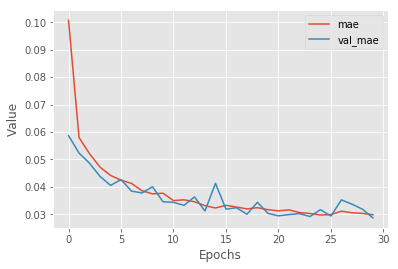

In [8]:
pyplot.style.use("ggplot")
pyplot.plot(history.history['mean_squared_error'], label='mse')
pyplot.plot(history.history['val_mean_squared_error'], label='val_mse')
pyplot.xlabel('Epochs')
pyplot.ylabel('Value')
pyplot.legend()
pyplot.show()
pyplot.plot(history.history["mean_absolute_error"], label="mae")
pyplot.plot(history.history["val_mean_absolute_error"], label="val_mae")
pyplot.xlabel('Epochs')
pyplot.ylabel('Value')
pyplot.legend()
pyplot.show()

Se realizan predicciones y se comparan con datos reales para comparación

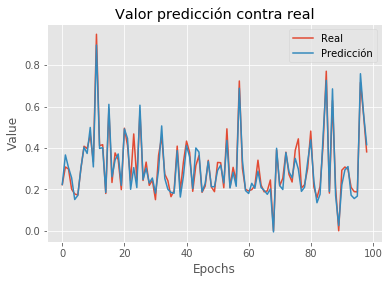

<Figure size 2560x1920 with 0 Axes>

In [9]:
#Predicciones con datos de prueba
predictions = model.predict(X_test, 10, verbose=2)

#Se grafican predicciones
pyplot.plot(y_test[1:100,], label='Real')
pyplot.plot(predictions[1:100,], label='Predicción')
pyplot.title('Valor predicción contra real')
pyplot.xlabel('Epochs')
pyplot.ylabel('Value')
pyplot.legend()
pyplot.figure(num=None, figsize=(8, 6), dpi=320, facecolor='w', edgecolor='k')
pyplot.show()